## Import libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

## Load the dataset

In [4]:
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Split into explanatory and response variables

In [42]:
X = pd.DataFrame(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])
y = df['Outcome']

## Split into train and test

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

## Feature scaling

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## SVM Model

In [45]:
model_SVC = SVC(kernel = 'rbf', random_state = 43)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

## LOgistic Model

In [46]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

## Calculating True Positive Rate(tpr) & False Positive Rate(fpr) for both models

In [49]:
log_fpr, log_tpr, threshold = roc_curve(y_test, y_pred_logistic)
log_auc = auc(log_fpr, log_tpr)

In [50]:
log_auc

0.8033333333333333

In [51]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
svm_auc = auc(svm_fpr, svm_tpr)

In [52]:
svm_auc

0.7885185185185186

## Plot the curves

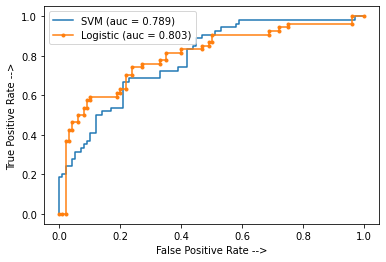

In [54]:
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % svm_auc)
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic (auc = %0.3f)' % log_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### Larger area means better model.